# pandas教學

* 被設計用來處理表格式和異值資料集
* 與numpy不同的是，numpy比較適用於處理同質的數值矩陣資料

In [1]:
import pandas as pd
import numpy as np

### 常用的pandas中的套件/資料結構
#### Series
#### DataFrame

In [2]:
from pandas import Series,DataFrame

### Series

* 什麼是Series?
    * 由值的陣列與index的陣列組成
    * 類似有次序的字典型態

In [4]:
obj = pd.Series([4,7,-5,3])
obj

0    4
1    7
2   -5
3    3
dtype: int64

In [5]:
print(obj)

0    4
1    7
2   -5
3    3
dtype: int64


In [7]:
# 利用 values及 index 屬性將值與index陣列分別取出
print(obj.index)
print(obj.values)

RangeIndex(start=0, stop=4, step=1)
[ 4  7 -5  3]


In [8]:
# 亦可以改變index
obj2 = pd.Series([4,7,-5,3],index = ['a','b','c','d'])
obj2

a    4
b    7
c   -5
d    3
dtype: int64

In [9]:
print(obj2.index)

Index(['a', 'b', 'c', 'd'], dtype='object')


In [10]:
# 利用index去呼叫各別的值
print(obj2['a'])
print(obj2['b'])
print(obj2['c'])
print(obj2['d'])

4
7
-5
3


In [11]:
print(obj2[['a','b','c']])

a    4
b    7
c   -5
dtype: int64


In [12]:
# 利用布林陣列過濾資料
obj2[obj2>0]

a    4
b    7
d    3
dtype: int64

In [13]:
# 純量乘法
obj2 * 4

a    16
b    28
c   -20
d    12
dtype: int64

In [15]:
# 使用到numpy函式
np.exp(obj2)

a      54.598150
b    1096.633158
c       0.006738
d      20.085537
dtype: float64

In [16]:
# 將字典型態的資料轉換成 Series
data = {'ohio':35000,'Texas':71000,'Oregon':16000,'Utah':5000}
obj3 = pd.Series(data)
obj3

ohio      35000
Texas     71000
Oregon    16000
Utah       5000
dtype: int64

In [18]:
# 當傳入的字典中，沒有index陣列設定中的值時，則會顯示NaN，其他以index陣列順序顯示
# 以此種方法可以更動index出現的順序
# NaN在pandas中顯示的是遺失或not available
states = ['台中','Utah','Texas','Oregon']
obj4 = pd.Series(data,index = states)
obj4

台中            NaN
Utah       5000.0
Texas     71000.0
Oregon    16000.0
dtype: float64

In [20]:
# 偵測是否有資料遺失(資料科學常用!!!)
pd.isnull(obj4)

台中         True
Utah      False
Texas     False
Oregon    False
dtype: bool

In [21]:
pd.notnull(obj4)

台中        False
Utah       True
Texas      True
Oregon     True
dtype: bool

In [22]:
obj4.isnull()

台中         True
Utah      False
Texas     False
Oregon    False
dtype: bool

In [23]:
# Series的好用之處
# 不同物件中若有相同index，可以做搭配運算
obj3+obj4

Oregon     32000.0
Texas     142000.0
Utah       10000.0
ohio           NaN
台中             NaN
dtype: float64

In [24]:
# Series物件和內部index都有name屬性
obj3.name = 'population'
obj3.index.name = 'states'
obj3

states
ohio      35000
Texas     71000
Oregon    16000
Utah       5000
Name: population, dtype: int64

* 上述差異
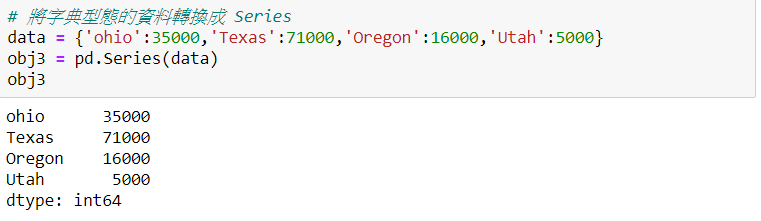

In [25]:
# 直接另外改變index陣列值
obj.index = ['k','u','o','t']
obj

k    4
u    7
o   -5
t    3
dtype: int64

* 上述比較
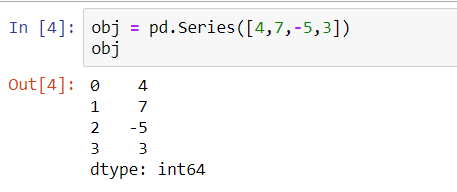

### DataFrame

* 一個方形的資料表，如同Excel檔一樣具有不同名稱的欄位，每個欄位可能是不同型態的資料(數字、字串、布林)
* 具有行與欄位的index，資料是以一個或多個二維區塊儲存
* 建立出的DataFrame與Seris一樣會被自動分配相應的index
* 可以輸入進DataFrame的資料


In [6]:
# 建立DataFrame
data = {'state':['Ohio','Ohio','Ohio','Nevada','Nevada','Nevada'],
       'year':[2000,2001,2002,2001,2002,2003],
       'pop':[1.5,1.7,3.6,2.4,2.9,3.2]}
frame = pd.DataFrame(data)
frame

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9
5,Nevada,2003,3.2


In [27]:
# 讀取DataFrame資料的前幾列
frame.head()

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9


In [28]:
# 更動行位順序的顯示
pd.DataFrame(data,columns=['year','state','pop'])

,year,state,pop
0,2000,Ohio,1.5
1,2001,Ohio,1.7
2,2002,Ohio,3.6
3,2001,Nevada,2.4
4,2002,Nevada,2.9
5,2003,Nevada,3.2


* 未更動行位順序
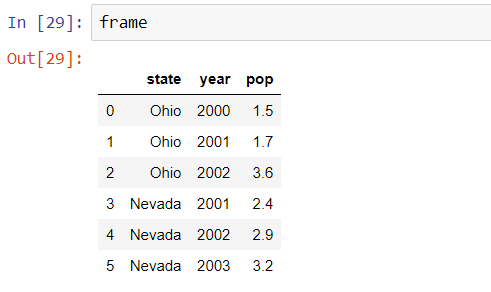

In [7]:
# 若指定的行位名稱不在原本的字典資料中時
# 最終會以NaN顯示
frame2 = pd.DataFrame(data,columns=['year','state','pop','debt'],
                     index = ['a','b','c','d','e','f'])
frame2

,year,state,pop,debt
a,2000,Ohio,1.5,NaN
b,2001,Ohio,1.7,NaN
c,2002,Ohio,3.6,NaN
d,2001,Nevada,2.4,NaN
e,2002,Nevada,2.9,NaN
f,2003,Nevada,3.2,NaN


In [3]:
# 查看DataFrame有多少維度，其大小為何
# Return a tuple representing the dimensionality of the DataFrame.
df = pd.DataFrame({'col1': [1, 2], 'col2': [3, 4], 'col3': [4,5], 'col4':[56,7]})
df.shape

(2, 4)

In [4]:
df

,col1,col2,col3,col4
0,1,3,4,56
1,2,4,5,7


In [32]:
# 查看有哪些欄位/行位
frame2.columns

Index(['year', 'state', 'pop', 'debt'], dtype='object')

In [8]:
# 取用某一欄位的資料，可利用類似字典的方法或屬性來呼喚某一欄位所有資料
# 以Series型態呈現
frame2['state']

a      Ohio
b      Ohio
c      Ohio
d    Nevada
e    Nevada
f    Nevada
Name: state, dtype: object

In [9]:
# 與frame2['state']相同
frame2.state

a      Ohio
b      Ohio
c      Ohio
d    Nevada
e    Nevada
f    Nevada
Name: state, dtype: object

In [34]:
# 使用時，欄位名稱必須符合合法的python變數名稱才可以使用
frame2.year

a    2000
b    2001
c    2002
d    2001
e    2002
f    2003
Name: year, dtype: int64

In [35]:
# 利用loc屬性將資料每列取出

frame2.loc['c']

year     2002
state    Ohio
pop       3.6
debt      NaN
Name: c, dtype: object

In [36]:
# 給值
frame2['debt'] = 16.5
frame2

,year,state,pop,debt
a,2000,Ohio,1.5,16.5
b,2001,Ohio,1.7,16.5
c,2002,Ohio,3.6,16.5
d,2001,Nevada,2.4,16.5
e,2002,Nevada,2.9,16.5
f,2003,Nevada,3.2,16.5


In [40]:
frame2['debt'] = np.arange(6.)
frame2

,year,state,pop,debt
a,2000,Ohio,1.5,0.0
b,2001,Ohio,1.7,1.0
c,2002,Ohio,3.6,2.0
d,2001,Nevada,2.4,3.0
e,2002,Nevada,2.9,4.0
f,2003,Nevada,3.2,5.0


In [49]:
# 若給值於不存在的欄位時，他會創造一個新的欄位，而自動對齊DataFrame上的index
# 其他未能匹配的部分就以NaN填上
frame2['ran'] = pd.Series([-1.2,5,4],index = ['a','b','f'])
frame2['jungle'] = pd.Series([-2.2,6,7],index = ['a','b','d'])
frame2

,year,state,pop,debt,ran,jungle
a,2000,Ohio,1.5,0.0,-1.2,-2.2
b,2001,Ohio,1.7,1.0,5.0,6.0
c,2002,Ohio,3.6,2.0,NaN,NaN
d,2001,Nevada,2.4,3.0,NaN,7.0
e,2002,Nevada,2.9,4.0,NaN,NaN
f,2003,Nevada,3.2,5.0,4.0,NaN


In [50]:
# 可以利用del關鍵字來將某一欄位刪除
frame2['eastern'] = frame2.state == 'Ohio'
frame2

,year,state,pop,debt,ran,jungle,eastern
a,2000,Ohio,1.5,0.0,-1.2,-2.2,True
b,2001,Ohio,1.7,1.0,5.0,6.0,True
c,2002,Ohio,3.6,2.0,NaN,NaN,True
d,2001,Nevada,2.4,3.0,NaN,7.0,False
e,2002,Nevada,2.9,4.0,NaN,NaN,False
f,2003,Nevada,3.2,5.0,4.0,NaN,False


In [52]:
del frame2['jungle']
frame2

,year,state,pop,debt,ran,eastern
a,2000,Ohio,1.5,0.0,-1.2,True
b,2001,Ohio,1.7,1.0,5.0,True
c,2002,Ohio,3.6,2.0,NaN,True
d,2001,Nevada,2.4,3.0,NaN,False
e,2002,Nevada,2.9,4.0,NaN,False
f,2003,Nevada,3.2,5.0,4.0,False


In [53]:
# 另一常見資料型態:字典中又包含字典這種巢式結構
# 會將最外層的字典key轉換成DataFrame的欄位index，將內層的key轉換成DataFrame列的index
# 依照列的index互相搭配，若位搭配到的會以NaN顯示
pop = {'Ohio':{2001:2.4,2002:2.9,2003:3.0},'Nevada':{2001:1.5,2002:2.3,2004:5.6}}
frame_pop = pd.DataFrame(pop)
frame_pop

,Ohio,Nevada
2001,2.4,1.5
2002,2.9,2.3
2003,3.0,NaN
2004,NaN,5.6


In [56]:
# 可以將DataFrame轉置
frame_pop.T

,2001,2002,2003,2004
Ohio,2.4,2.9,3.0,NaN
Nevada,1.5,2.3,NaN,5.6


In [57]:
pd.DataFrame(pop,index = [2001,2001,2003])

,Ohio,Nevada
2001,2.4,1.5
2001,2.4,1.5
2003,3.0,NaN


In [59]:
pdata = {'Ohio':frame_pop['Ohio'][:-1],'Nevada':frame_pop['Nevada'][:3]}
pd.DataFrame(pdata)

,Ohio,Nevada
2001,2.4,1.5
2002,2.9,2.3
2003,3.0,NaN


In [60]:
# DataFrame亦可以用index與columns的name屬性
frame_pop.index.name = 'year'
frame_pop.columns.name = 'state'
frame_pop

state,Ohio,Nevada
year,,
2001,2.4,1.5
2002,2.9,2.3
2003,3.0,NaN
2004,NaN,5.6


In [61]:
# 若要呼叫DataFrame中的value值
frame_pop.values

array([[2.4, 1.5],
       [2.9, 2.3],
       [3. , nan],
       [nan, 5.6]])

## 重要功能
### 重做索引

In [3]:
obj = pd.Series([4.5,7.2,-5.3,3.6],index = ['b','c','d','a'])
obj

b    4.5
c    7.2
d   -5.3
a    3.6
dtype: float64

In [5]:
# 將index重新排列分配，若新的index有無法跟舊的index匹配的狀況，會以NaN填上
obj2 = obj.reindex(['a','b','c','e'])
obj2

a    3.6
b    4.5
c    7.2
e    NaN
dtype: float64

In [6]:
# 具有時間序列的資料，在做reindex時，想做內插或填值時，可以利用method = 'ffill'參考前面的值填入
obj3 = pd.Series(['blue','yellow','red'],index = [0,3,5])
obj3

0      blue
3    yellow
5       red
dtype: object

In [7]:
target = obj3.reindex(range(6),method = 'ffill')
target

0      blue
1      blue
2      blue
3    yellow
4    yellow
5       red
dtype: object

#### DataFrame reindex

* reindex(labels=None, index=None, columns=None, axis=None, method=None, copy=True, level=None, fill_value=nan, limit=None, tolerance=None) 
    * 各項參數:
        * method:內插填值方法，僅適用於index單調增加與單調減少的情況
            * 'pad' or 'ffill':意思是會參考前一個值，做複製填值的動作
            * 'backfill' or 'bfill':會複製後面一個值來填值
            * 'nearest':觀望離最近的值作為參考並複製填值
        * copy:為填入布林值的參數設定，當填入
            * True:此為預設的，即當要重新排序的index與舊的index相同時，也會進行底層資料複製
            * False:遇到新舊index相同時，不會進行底層的資料複製
        * level:當使用的是MultiIndex時，可以指定匹配哪一層的index
            * 可以填入int or name
        * limit:
        * fill_value
        

In [3]:
array = np.arange(9).reshape((3,3))
frame = pd.DataFrame(array,columns=['Ohio','Texas','California'],index=['a','c','d'])
frame

,Ohio,Texas,California
a,0,1,2
c,3,4,5
d,6,7,8


In [4]:
# 若只傳一個序列要reindex DataFrame則會重新排序列上的排序
frame2 = frame.reindex(['a','b','c','d'])
frame2

,Ohio,Texas,California
a,0.0,1.0,2.0
b,NaN,NaN,NaN
c,3.0,4.0,5.0
d,6.0,7.0,8.0


In [5]:
# 若用columns = []可以對欄位做重新索引
frame3 = frame.reindex(['a','b','c','d'],columns=['Texas','California','NewYork','Ohio'])
frame3

,Texas,California,NewYork,Ohio
a,1.0,2.0,NaN,0.0
b,NaN,NaN,NaN,NaN
c,4.0,5.0,NaN,3.0
d,7.0,8.0,NaN,6.0


In [7]:
help(frame.reindex)

Help on method reindex in module pandas.core.frame:

reindex(labels=None, index=None, columns=None, axis=None, method=None, copy=True, level=None, fill_value=nan, limit=None, tolerance=None) method of pandas.core.frame.DataFrame instance
    Conform DataFrame to new index with optional filling logic, placing
    NA/NaN in locations having no value in the previous index. A new object
    is produced unless the new index is equivalent to the current one and
    ``copy=False``.
    
    Parameters
    ----------
    labels : array-like, optional
                New labels / index to conform the axis specified by 'axis' to.
    index, columns : array-like, optional
        New labels / index to conform to, should be specified using
        keywords. Preferably an Index object to avoid duplicating data
    axis : int or str, optional
                Axis to target. Can be either the axis name ('index', 'columns')
                or number (0, 1).
    method : {None, 'backfill'/'bfill', 'pad

In [9]:
# 練習DataFrame重新索引
index = ['Firefox', 'Chrome', 'Safari', 'IE10', 'Konqueror']
df = pd.DataFrame({'http_status': [200,200,404,404,301],'response_time': [0.04, 0.02, 0.07, 0.08, 1.0]},index = index)
df

,http_status,response_time
Firefox,200,0.04
Chrome,200,0.02
Safari,404,0.07
IE10,404,0.08
Konqueror,301,1.00


In [10]:
new_index= ['Safari', 'Iceweasel', 'Comodo Dragon', 'IE10','Chrome']
df_new = df.reindex(new_index)
df_new

,http_status,response_time
Safari,404.0,0.07
Iceweasel,NaN,NaN
Comodo Dragon,NaN,NaN
IE10,404.0,0.08
Chrome,200.0,0.02


In [11]:
# 當在重新索引時有遺失值發生，則可以使用fill_value:用替代值替代
df_fixedNew = df.reindex(new_index,fill_value = 0)
df_fixedNew

,http_status,response_time
Safari,404,0.07
Iceweasel,0,0.00
Comodo Dragon,0,0.00
IE10,404,0.08
Chrome,200,0.02


In [12]:
df_fixedNew2 = df.reindex(new_index,fill_value= 'missing')
df_fixedNew2

,http_status,response_time
Safari,404,0.07
Iceweasel,missing,missing
Comodo Dragon,missing,missing
IE10,404,0.08
Chrome,200,0.02


In [13]:
# 當要重新排序欄位時
# 第一可以用參數columns=[]
# 第二可以用參數axis="columns"
df.reindex(['http_status','user_agent'],axis='columns')

,http_status,user_agent
Firefox,200,NaN
Chrome,200,NaN
Safari,404,NaN
IE10,404,NaN
Konqueror,301,NaN


In [14]:
#
date_index = pd.date_range('1/1/2010', periods=6, freq='D')
df2 = pd.DataFrame({"prices": [100, 101, np.nan, 100, 89, 88]},index=date_index)
df2

,prices
2010-01-01,100.0
2010-01-02,101.0
2010-01-03,NaN
2010-01-04,100.0
2010-01-05,89.0
2010-01-06,88.0


In [15]:
date_index2 = pd.date_range('12/29/2009', periods=10, freq='D')
df3 = df2.reindex(date_index2)
df3

,prices
2009-12-29,NaN
2009-12-30,NaN
2009-12-31,NaN
2010-01-01,100.0
2010-01-02,101.0
2010-01-03,NaN
2010-01-04,100.0
2010-01-05,89.0
2010-01-06,88.0
2010-01-07,NaN


In [16]:
# 由於index是有單調性增加的，所以可以使用method參數來填值
df4 = df2.reindex(date_index2,method = 'bfill')
df4

,prices
2009-12-29,100.0
2009-12-30,100.0
2009-12-31,100.0
2010-01-01,100.0
2010-01-02,101.0
2010-01-03,NaN
2010-01-04,100.0
2010-01-05,89.0
2010-01-06,88.0
2010-01-07,NaN


### 指定軸刪除資料

In [17]:
obj = pd.Series(np.arange(5.),index=['a','b','c','d','e'])
obj

a    0.0
b    1.0
c    2.0
d    3.0
e    4.0
dtype: float64

In [18]:
# 刪除某一或多個軸的index陣列
new_obj = obj.drop('c')
new_obj

a    0.0
b    1.0
d    3.0
e    4.0
dtype: float64

In [20]:
new_obj2 = obj.drop(['c','b'])
new_obj2

a    0.0
d    3.0
e    4.0
dtype: float64

In [21]:
# 若是DataFrame兩個軸都可以指定index的方法刪除資料
frame = pd.DataFrame(np.arange(16).reshape((4,4)),columns=['one','two','three','four'],index=['Ohio','Colorado','Utah','New York'])
frame

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [22]:
# 若未設定是刪除哪一軸的index時，則是刪除列的index指定陣列
frame_new = frame.drop(['Ohio','Utah'])
frame_new

,one,two,three,four
Colorado,4,5,6,7
New York,12,13,14,15


In [23]:
# 若要設定某一軸的index指定陣列
# 在axis參數設定
# axis = 1或axis = 'columns'則為指定要刪除欄的指定index資料
frame_new2 = frame.drop(['two','four'],axis = 'columns')
frame_new2

,one,three
Ohio,0,2
Colorado,4,6
Utah,8,10
New York,12,14


In [24]:
# inplace參數:布林值，指定修改資料的方法不再建立新物件
# 由以下兩個cell能得知，drop()方法在執行後，其實會建造一個新的物件呈現刪除資料後的樣子
# 若使用inplace = True，則drop()方法在執行後，並不會再製造一個新物件，而是將舊資料刪除，更新新的資料
frame.drop(['Ohio','New York'])

,one,two,three,four
Colorado,4,5,6,7
Utah,8,9,10,11


In [25]:
frame

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [26]:
frame.drop(['Ohio','New York'],inplace=True)

In [27]:
frame

,one,two,three,four
Colorado,4,5,6,7
Utah,8,9,10,11


### 索引、選擇、過濾

In [30]:
# Series做索引的動作
obj = pd.Series(np.arange(4.),index=['a','b','c','d'])
print(obj)
print(obj['c'])

a    0.0
b    1.0
c    2.0
d    3.0
dtype: float64
2.0


In [31]:
obj[1]

1.0

In [32]:
obj[2:4]

c    2.0
d    3.0
dtype: float64

In [33]:
obj[['a','b','d']]

a    0.0
b    1.0
d    3.0
dtype: float64

In [35]:
obj[obj<2]

a    0.0
b    1.0
dtype: float64

In [37]:
# 注意:用標籤來做切片的動作，與一般python切片有些差異，其不會切除尾端的資料
obj['a':'c']

a    0.0
b    1.0
c    2.0
dtype: float64

In [38]:
# 更動數值
obj['b':'c'] = 23
obj

a     0.0
b    23.0
c    23.0
d     3.0
dtype: float64

In [39]:
# 對DataFrame做索引
frame = pd.DataFrame(np.arange(16).reshape((4,4)),columns=['one','two','three','four'],index=['Ohio','Colorado','Utah','New York'])
frame

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [41]:
frame['two']

Ohio         1
Colorado     5
Utah         9
New York    13
Name: two, dtype: int32

In [42]:
frame.loc['New York']

one      12
two      13
three    14
four     15
Name: New York, dtype: int32

In [45]:
# 注意:用標籤來做切片的動作，與一般python切片有些差異，其不會切除尾端的資料
frame.loc['Ohio':'Utah']

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11


In [43]:
frame[['one','three']]

,one,three
Ohio,0,2
Colorado,4,6
Utah,8,10
New York,12,14


In [44]:
frame[:2]

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7


In [46]:
frame[frame['three']>8]

,one,two,three,four
Utah,8,9,10,11
New York,12,13,14,15


In [47]:
frame < 5

,one,two,three,four
Ohio,True,True,True,True
Colorado,True,False,False,False
Utah,False,False,False,False
New York,False,False,False,False


In [48]:
frame[frame<5] = 0
frame

,one,two,three,four
Ohio,0,0,0,0
Colorado,0,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


### 用loc和iloc做選擇
* loc屬性:用來處理標籤索引，標籤索引在做切片時，不會去除尾端
* iloc屬性:用來處理數字索引

In [51]:
# 利用loc去選擇某一列的多個欄位資料
frame.loc['New York',['two','four']]

two     13
four    15
Name: New York, dtype: int32

In [50]:
# 利用iloc做以上類似的動作
frame.iloc[3,[1,3]]

two     13
four    15
Name: New York, dtype: int32

In [52]:
frame.iloc[[1,3],[1,3]]

,two,four
Colorado,5,7
New York,13,15


In [53]:
frame.loc[['Colorado','New York'],['two','four']]

,two,four
Colorado,5,7
New York,13,15


In [55]:
frame.loc['Ohio':'Utah','one':'three']

,one,two,three
Ohio,0,0,0
Colorado,0,5,6
Utah,8,9,10


### 整數索引

* pandas物件用整數索引跟一般list、tuple這些內建的資料結構的整數索引有些差異
    * 若用標籤索引，在使用切片功能時，尾端的資料不會被切除
    * 若用數字索引時，在使用切片功能時，尾端的資料會被切除
    * 所以當你有一個軸的index是含有整數但卻想用數字索引去喚出取得單一值時，可能會造成一些小bug
        * 我們可以用loc或iloc屬性做更明確的處理
            * loc屬性是用標籤索引去喚出資料
            * iloc屬性是用數字索引去喚出資料

In [3]:
obj = pd.Series(np.arange(3.))
obj

0    0.0
1    1.0
2    2.0
dtype: float64

In [4]:
# 是使用位置索引還是標籤索引?
obj[-1]

KeyError: -1

In [10]:
obj[:2]

0    0.0
1    1.0
dtype: float64

In [5]:
# 若使用非數字index，即不會在混淆
obj2 = pd.Series(np.arange(4.),index=['a','b','c','d'])
obj2

a    0.0
b    1.0
c    2.0
d    3.0
dtype: float64

In [6]:
obj2[-1]

3.0

In [7]:
Ser = pd.Series(np.arange(5.))
Ser

0    0.0
1    1.0
2    2.0
3    3.0
4    4.0
dtype: float64

In [8]:
# 使用數字索引，但沒有更明確的處理
Ser[:2]

0    0.0
1    1.0
dtype: float64

In [9]:
# 使用標籤索引 loc屬性
Ser.loc[:2]

0    0.0
1    1.0
2    2.0
dtype: float64

In [11]:
# 使用數字索引iloc屬性
Ser.iloc[:-2]

0    0.0
1    1.0
2    2.0
dtype: float64

### 算術運算與資料對齊

* 擁有不同index的物件做算術運算時，會以怎樣方式去運算?
    * 如果在做運算時，兩個物件的index無重複的，則產出端的index會以運算端的index做聯集產出
        * 而沒有配對的index則會在運算後給出遺失值，而這些遺失值在之後做其他算術運算時將會傳播(?)
        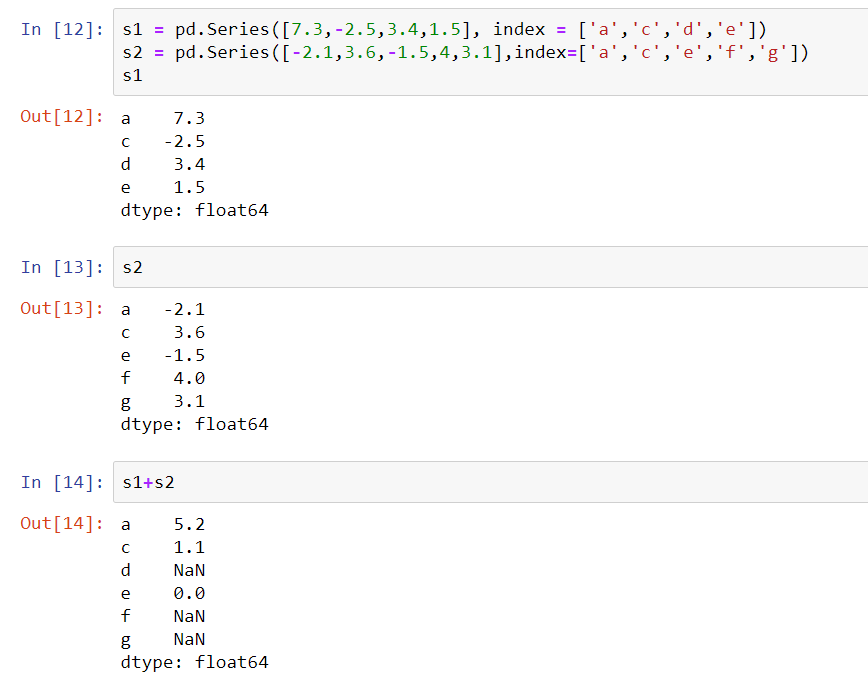

In [12]:
s1 = pd.Series([7.3,-2.5,3.4,1.5], index = ['a','c','d','e'])
s2 = pd.Series([-2.1,3.6,-1.5,4,3.1],index=['a','c','e','f','g'])
s1

a    7.3
c   -2.5
d    3.4
e    1.5
dtype: float64

In [13]:
s2

a   -2.1
c    3.6
e   -1.5
f    4.0
g    3.1
dtype: float64

In [14]:
s1+s2

a    5.2
c    1.1
d    NaN
e    0.0
f    NaN
g    NaN
dtype: float64

In [4]:
# 使用DataFrame來做運算時，欄與列皆會做對齊
df1 = pd.DataFrame(np.arange(16.).reshape((4,4)),columns=list('bcde'),index=['Utah','Ohio','Texas','Oregon'])
df1

,b,c,d,e
Utah,0.0,1.0,2.0,3.0
Ohio,4.0,5.0,6.0,7.0
Texas,8.0,9.0,10.0,11.0
Oregon,12.0,13.0,14.0,15.0


In [5]:
df2 = pd.DataFrame(np.arange(9.).reshape((3,3)),columns=list('abc'),index=['Ohio','Texas','Colorado'])
df2

,a,b,c
Ohio,0.0,1.0,2.0
Texas,3.0,4.0,5.0
Colorado,6.0,7.0,8.0


In [6]:
# 在加法下，列與欄皆會配對各個index，並形成新的聯集結果
# 在列與欄未配對成功下，會填上遺失值NaN
df1+df2

,a,b,c,d,e
Colorado,NaN,NaN,NaN,NaN,NaN
Ohio,NaN,5.0,7.0,NaN,NaN
Oregon,NaN,NaN,NaN,NaN,NaN
Texas,NaN,12.0,14.0,NaN,NaN
Utah,NaN,NaN,NaN,NaN,NaN


### 算術運算與填值

* df1+df2 同於 df1.add(df2)
* df1-df2 同於 df1.sub(df2)
    * A.rsub(B):為B-A的意思
* df1/df2 同於 df1.div(df2)
    * A.rdiv(B):B/A
* df1//df2 同於 df1.floordiv(df2) 
    * A.rfloordiv(B):B//A
* df1*df2 同於 df1.mul(df2)
    * A.rmul(B):B*A
* df1**df2 同於 df1.poe(df2)
    * A.rpow(B):B**A

In [7]:
df1 = pd.DataFrame(np.arange(12.).reshape((3,4)),columns=list('abcd'))
df2 = pd.DataFrame(np.arange(20.).reshape((4,5)),columns=list('abcde'))

In [8]:
df2.loc[1,'b'] = np.nan

In [9]:
df1

,a,b,c,d
0,0.0,1.0,2.0,3.0
1,4.0,5.0,6.0,7.0
2,8.0,9.0,10.0,11.0


In [10]:
df2

,a,b,c,d,e
0,0.0,1.0,2.0,3.0,4.0
1,5.0,NaN,7.0,8.0,9.0
2,10.0,11.0,12.0,13.0,14.0
3,15.0,16.0,17.0,18.0,19.0


In [11]:
# 當將兩個DataFrame加在一起時，若沒有匹配到的欄與列將會以遺失值填入
df1+df2

,a,b,c,d,e
0,0.0,2.0,4.0,6.0,NaN
1,9.0,NaN,13.0,15.0,NaN
2,18.0,20.0,22.0,24.0,NaN
3,NaN,NaN,NaN,NaN,NaN


In [12]:
# 若不想沒有匹配到的欄與列填上遺失值，則可以用DataFrame或Series中的數學運算方法來運算
df1.add(df2,fill_value=0)

,a,b,c,d,e
0,0.0,2.0,4.0,6.0,4.0
1,9.0,5.0,13.0,15.0,9.0
2,18.0,20.0,22.0,24.0,14.0
3,15.0,16.0,17.0,18.0,19.0


In [13]:
df2.add(df1,fill_value=0)

,a,b,c,d,e
0,0.0,2.0,4.0,6.0,4.0
1,9.0,5.0,13.0,15.0,9.0
2,18.0,20.0,22.0,24.0,14.0
3,15.0,16.0,17.0,18.0,19.0


In [14]:
# 兩資料結構相減
df1-df2

,a,b,c,d,e
0,0.0,0.0,0.0,0.0,NaN
1,-1.0,NaN,-1.0,-1.0,NaN
2,-2.0,-2.0,-2.0,-2.0,NaN
3,NaN,NaN,NaN,NaN,NaN


In [15]:
# 此為 df1-df2
df1.sub(df2,fill_value=0)

,a,b,c,d,e
0,0.0,0.0,0.0,0.0,-4.0
1,-1.0,5.0,-1.0,-1.0,-9.0
2,-2.0,-2.0,-2.0,-2.0,-14.0
3,-15.0,-16.0,-17.0,-18.0,-19.0


In [16]:
# rsub()方法的意思即為參數會反過來做計算
-(df1.rsub(df2,fill_value=0))

,a,b,c,d,e
0,-0.0,-0.0,-0.0,-0.0,-4.0
1,-1.0,5.0,-1.0,-1.0,-9.0
2,-2.0,-2.0,-2.0,-2.0,-14.0
3,-15.0,-16.0,-17.0,-18.0,-19.0


In [17]:
# 兩資料結構相除
df1/df2

,a,b,c,d,e
0,NaN,1.000000,1.000000,1.000000,NaN
1,0.8,NaN,0.857143,0.875000,NaN
2,0.8,0.818182,0.833333,0.846154,NaN
3,NaN,NaN,NaN,NaN,NaN


In [18]:
# 同於df1/df2
df1.div(df2,fill_value=0)

,a,b,c,d,e
0,NaN,1.000000,1.000000,1.000000,0.0
1,0.8,inf,0.857143,0.875000,0.0
2,0.8,0.818182,0.833333,0.846154,0.0
3,0.0,0.000000,0.000000,0.000000,0.0


In [19]:
1/df1.rdiv(df2,fill_value=0)

,a,b,c,d,e
0,NaN,1.000000,1.000000,1.000000,0.0
1,0.8,inf,0.857143,0.875000,0.0
2,0.8,0.818182,0.833333,0.846154,0.0
3,0.0,0.000000,0.000000,0.000000,0.0


In [20]:
# 兩資料結構做整除
df1//df2

,a,b,c,d,e
0,NaN,1.0,1.0,1.0,NaN
1,0.0,NaN,0.0,0.0,NaN
2,0.0,0.0,0.0,0.0,NaN
3,NaN,NaN,NaN,NaN,NaN


In [21]:
# 同於 df1//df2
df1.floordiv(df2,fill_value=0)

,a,b,c,d,e
0,NaN,1.0,1.0,1.0,-0.0
1,0.0,NaN,0.0,0.0,-0.0
2,0.0,0.0,0.0,0.0,-0.0
3,-0.0,-0.0,-0.0,-0.0,-0.0


### 在DataFrame和Series之間的運算

* 廣播(broadcasting)定義:
* 以欄位作為配對，對列進行廣播
    * frame.sub(series4)
* 以列的index作為配對，對欄位進行廣播
    * frame.sub(series3,axis='index')
        * 其中axis='index'或axis = 0 即是設定要匹配的軸為列

In [22]:
arr = np.arange(12.).reshape((3,4))
arr

array([[ 0.,  1.,  2.,  3.],
       [ 4.,  5.,  6.,  7.],
       [ 8.,  9., 10., 11.]])

In [23]:
arr[0]

array([0., 1., 2., 3.])

In [24]:
# 觀察他會怎樣做運算
# 從arr-arr[0]時，他會對arr每一列下去剪掉arr[0]，此稱為廣播(broadcasting)
arr-arr[0]

array([[0., 0., 0., 0.],
       [4., 4., 4., 4.],
       [8., 8., 8., 8.]])

In [25]:
frame = pd.DataFrame(np.arange(12.).reshape((4,3)),columns=list('bcd'),index=['Utah','Ohio','Texas','Oregon'])
frame

,b,c,d
Utah,0.0,1.0,2.0
Ohio,3.0,4.0,5.0
Texas,6.0,7.0,8.0
Oregon,9.0,10.0,11.0


In [27]:
series = frame.loc['Ohio']
series

b    3.0
c    4.0
d    5.0
Name: Ohio, dtype: float64

In [28]:
# DataFrame與Series相減 : 先找出互相匹配的index，在從該index往下做廣播(broadcasting)
frame-series

,b,c,d
Utah,-3.0,-3.0,-3.0
Ohio,0.0,0.0,0.0
Texas,3.0,3.0,3.0
Oregon,6.0,6.0,6.0


In [29]:
# 如果index值在DataFrame的欄位裡找不到，或是在Series中找不到，那麼產出的物件就會以聯集結果重做索引呈現
series2 = pd.Series([2.1,3.3,4.5],index=['b','e','f'])
series2

b    2.1
e    3.3
f    4.5
dtype: float64

In [30]:
frame-series2

,b,c,d,e,f
Utah,-2.1,NaN,NaN,NaN,NaN
Ohio,0.9,NaN,NaN,NaN,NaN
Texas,3.9,NaN,NaN,NaN,NaN
Oregon,6.9,NaN,NaN,NaN,NaN


In [31]:
# 用列index做匹配，對欄做廣播
series3 = frame['d']
series3

Utah       2.0
Ohio       5.0
Texas      8.0
Oregon    11.0
Name: d, dtype: float64

In [32]:
frame.sub(series3,axis='index')

,b,c,d
Utah,-2.0,-1.0,0.0
Ohio,-2.0,-1.0,0.0
Texas,-2.0,-1.0,0.0
Oregon,-2.0,-1.0,0.0


In [33]:
series4 = frame.loc['Utah']
series4

b    0.0
c    1.0
d    2.0
Name: Utah, dtype: float64

In [36]:
frame.sub(series4)

,b,c,d
Utah,0.0,0.0,0.0
Ohio,3.0,3.0,3.0
Texas,6.0,6.0,6.0
Oregon,9.0,9.0,9.0


### apply和applymap

In [3]:
frame = pd.DataFrame(np.random.randn(4,3),columns=list('bde'),index=['Utah','Ohio','Texas','Oregon'])
frame

,b,d,e
Utah,1.296740,-0.938111,0.557200
Ohio,-0.098161,-1.157418,1.312715
Texas,-0.204975,-1.817414,0.090874
Oregon,0.166217,-1.392752,1.459456


In [4]:
# NumPy全域函數或元素級別陣列方法對pandas物件也適用
np.abs(frame)

,b,d,e
Utah,1.296740,0.938111,0.557200
Ohio,0.098161,1.157418,1.312715
Texas,0.204975,1.817414,0.090874
Oregon,0.166217,1.392752,1.459456


In [5]:
# 逐欄或逐列套用一個函式，可以用DataFrame的apply方法來設定
# 目前的設定為逐欄去套用f函式
# 將每欄中的最大數-最小數
# 最後以Series呈現，Series的index為原本DataFrame的欄位
f = lambda x:x.max()-x.min()
frame.apply(f)

b    1.501715
d    0.879304
e    1.368582
dtype: float64

In [6]:
# 若要逐列去呼叫套用f
frame.apply(f,axis='columns')

Utah      2.234851
Ohio      2.470134
Texas     1.908288
Oregon    2.852208
dtype: float64

In [7]:
# 傳給apply的函式不一定要回傳常數值；它也可以回傳含有多個值的Series
def f(x):
    return pd.Series([x.min(),x.max()],index=['min','max'])
frame.apply(f)

,b,d,e
min,-0.204975,-1.817414,0.090874
max,1.296740,-0.938111,1.459456


In [8]:
# 若想要以元素級別函式來處理DataFrame中的所有元素，可以使用applymap()
f = lambda x: '%.2f' % x
frame.applymap(f)

,b,d,e
Utah,1.30,-0.94,0.56
Ohio,-0.10,-1.16,1.31
Texas,-0.20,-1.82,0.09
Oregon,0.17,-1.39,1.46


In [9]:
# applymap()的map由來
# 由於Series中有一個方法為map()其會對於Series中的所有元素級別進行動作
frame['e'].map(format)

Utah      0.5572001207192938
Ohio       1.312715373222668
Texas     0.0908738636810046
Oregon    1.4594557336060534
Name: e, dtype: object

### 排序和排名

* 可以使用sort_index()方法，依照列或欄index照字典序排序，並回傳新建排好的物件
* 若是DataFrame，則可以指定要哪個軸來做排序
    * frame.sort_index():此為排序列的index
    * frame.sort_index(axis='columns'):此為排序欄位的index
* sort_index()排序的預設是遞增排序
    * 若要遞減排序:frame.sort_index(ascending=False)
* 對值進行排序則使用sort_value()
    * 對於Series，若有遺失值會將遺失值排在最後面
    * 對於DataFrame，可以進行欄位方向的值排序，亦可以進行列方向的值排序
        * 若進行列方向的值排序，可以在進行選擇要哪一個欄位要進行列方向的值排序
            * frame.sort_values(by='b')此為進行欄位b的列方向值排序

#### 排名

* rank(axis=0, method='average', numeric_only=None, na_option='keep', ascending=True, pct=False)
    * method : {'average', 'min', 'max', 'first', 'dense'}→為決定當排名中有同樣數值時，該如何處理
        * average: average rank of group
        * min: lowest rank in group
        * max: highest rank in group
        * first: ranks assigned in order they appear in the array 在陣列中若為先出現的值，則排名為比較優先的
        * dense: like 'min', but rank always increases by 1 between groups 与'min'類似，即並列的數據只佔據一个名次

In [10]:
obj = pd.Series(range(5),index=['b','a','d','e','c'])
obj

b    0
a    1
d    2
e    3
c    4
dtype: int64

In [11]:
obj.sort_index()

a    1
b    0
c    4
d    2
e    3
dtype: int64

In [12]:
# 若是DataFrame，則可以指定要哪個軸來做排序
frame = pd.DataFrame(np.arange(8).reshape((2,4)),columns=list('dabc'),index=['three','one'])
frame

,d,a,b,c
three,0,1,2,3
one,4,5,6,7


In [13]:
frame.sort_index()

,d,a,b,c
one,4,5,6,7
three,0,1,2,3


In [14]:
# 若要排序欄位
frame.sort_index(axis='columns')

,a,b,c,d
three,1,2,3,0
one,5,6,7,4


In [15]:
# 遞減排序
frame.sort_index(axis='columns',ascending=False)

,d,c,b,a
three,0,3,2,1
one,4,7,6,5


In [16]:
# 對值進行排序
obj = pd.Series([4,7,-3,2])
obj

0    4
1    7
2   -3
3    2
dtype: int64

In [17]:
obj.sort_values()

2   -3
3    2
0    4
1    7
dtype: int64

In [18]:
obj2 = pd.Series([3,2,6,-3,np.nan,10,23,np.nan])
obj2

0     3.0
1     2.0
2     6.0
3    -3.0
4     NaN
5    10.0
6    23.0
7     NaN
dtype: float64

In [19]:
obj2.sort_values()

3    -3.0
1     2.0
0     3.0
2     6.0
5    10.0
6    23.0
4     NaN
7     NaN
dtype: float64

In [20]:
# 若要排序DataFrame中的值
frame = pd.DataFrame({'b':[4,7,-3,2],'a':[0,1,0,1]})
frame

,b,a
0,4,0
1,7,1
2,-3,0
3,2,1


In [21]:
frame.sort_values(by='b')

,b,a
2,-3,0
3,2,1
0,4,0
1,7,1


In [23]:
# 若要多欄進行列方向的值排序
frame.sort_values(by=['a','b'])

,b,a
2,-3,0
0,4,0
3,2,1
1,7,1


In [24]:
frame.sort_values(by=['b','a'])

,b,a
2,-3,0
3,2,1
0,4,0
1,7,1


In [25]:
help(frame.sort_values)

Help on method sort_values in module pandas.core.frame:

sort_values(by, axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last') method of pandas.core.frame.DataFrame instance
    Sort by the values along either axis
    
    Parameters
    ----------
            by : str or list of str
                Name or list of names to sort by.
    
                - if `axis` is 0 or `'index'` then `by` may contain index
                  levels and/or column labels
                - if `axis` is 1 or `'columns'` then `by` may contain column
                  levels and/or index labels
    
                .. versionchanged:: 0.23.0
                   Allow specifying index or column level names.
    axis : {0 or 'index', 1 or 'columns'}, default 0
         Axis to be sorted
    ascending : bool or list of bool, default True
         Sort ascending vs. descending. Specify list for multiple sort
         orders.  If this is a list of bools, must match the length of
        

In [26]:
# 練習sort_value()
df = pd.DataFrame({'col1' : ['A', 'A', 'B', np.nan, 'D', 'C'],
                   'col2' : [2, 1, 9, 8, 7, 4],
                   'col3': [0, 1, 9, 4, 2, 3],})
df

,col1,col2,col3
0,A,2,0
1,A,1,1
2,B,9,9
3,NaN,8,4
4,D,7,2
5,C,4,3


In [27]:
# Sort by col1
df.sort_values(by='col1')

,col1,col2,col3
0,A,2,0
1,A,1,1
2,B,9,9
5,C,4,3
4,D,7,2
3,NaN,8,4


In [28]:
# Sort by multiple columns
df.sort_values(by=['col1', 'col2'])

,col1,col2,col3
1,A,1,1
0,A,2,0
2,B,9,9
5,C,4,3
4,D,7,2
3,NaN,8,4


In [29]:
# Putting NAs first
df.sort_values(by='col1', ascending=False, na_position='first')

,col1,col2,col3
3,NaN,8,4
4,D,7,2
5,C,4,3
2,B,9,9
0,A,2,0
1,A,1,1


In [30]:
obj = pd.Series([7,-5,7,4,2,0,4])
obj.rank()
# 在排名下:-5 0 2 4 4 7 7
# 4與4 為排名第4與5，若遇到相同值時，將相同值的排名次做平均，故兩個4為排名4.5
# 7與7 為排名第6與7，兩個7排名為6.5
# 在排名下，依序為6.5 1 6.5 4.5 3 2 4.5

0    6.5
1    1.0
2    6.5
3    4.5
4    3.0
5    2.0
6    4.5
dtype: float64

In [32]:
help(obj.rank)

Help on method rank in module pandas.core.generic:

rank(axis=0, method='average', numeric_only=None, na_option='keep', ascending=True, pct=False) method of pandas.core.series.Series instance
    Compute numerical data ranks (1 through n) along axis. Equal values are
    assigned a rank that is the average of the ranks of those values.
    
    Parameters
    ----------
    axis : {0 or 'index', 1 or 'columns'}, default 0
        index to direct ranking
    method : {'average', 'min', 'max', 'first', 'dense'}
        * average: average rank of group
        * min: lowest rank in group
        * max: highest rank in group
        * first: ranks assigned in order they appear in the array
        * dense: like 'min', but rank always increases by 1 between groups
    numeric_only : boolean, default None
        Include only float, int, boolean data. Valid only for DataFrame or
        Panel objects
    na_option : {'keep', 'top', 'bottom'}
        * keep: leave NA values where they are
   

In [33]:
# 先出現的值為優先決定排名
obj.rank(method='first')

0    6.0
1    1.0
2    7.0
3    4.0
4    3.0
5    2.0
6    5.0
dtype: float64

In [34]:
# 指定降冪排序
obj.rank(ascending=False,method='max')

0    2.0
1    7.0
2    2.0
3    4.0
4    5.0
5    6.0
6    4.0
dtype: float64

In [35]:
obj.rank(ascending=True,method='dense')
# method = 'dense'為並列的數據只佔一位
# 為排名 -5 0 2 4 7

0    5.0
1    1.0
2    5.0
3    4.0
4    3.0
5    2.0
6    4.0
dtype: float64

In [36]:
# DataFrame做排名
frame = pd.DataFrame({'a':[3,2,4.5,8.7],'c':[4,1,6.7,2.3],'b':[3,9,10,2]})
frame

,a,c,b
0,3.0,4.0,3
1,2.0,1.0,9
2,4.5,6.7,10
3,8.7,2.3,2


In [37]:
frame.rank(axis='columns')

,a,c,b
0,1.5,3.0,1.5
1,2.0,1.0,3.0
2,1.0,2.0,3.0
3,3.0,2.0,1.0


### 軸index有重複的標籤

* obj.index.is_unique利用is_unique來確認index是否有重複的標籤

In [38]:
obj = pd.Series(range(5),index=['a','a','b','b','c'])
obj

a    0
a    1
b    2
b    3
c    4
dtype: int64

In [40]:
obj.index.is_unique

False

In [41]:
# 當軸的index有重複時，我們呼叫該index時，其會回傳一個Series
obj['a']

a    0
a    1
dtype: int64

In [42]:
# 若呼叫無重複index時，其會回傳一個常數
obj['c']

4

### 匯總合計算描述性統計量

In [43]:
df = pd.DataFrame([[1.4,np.nan],[7.1,-4.5],[np.nan,np.nan],[0.75,-1.3]],columns=['one','two'],index=list('abcd'))
df

,one,two
a,1.40,NaN
b,7.10,-4.5
c,NaN,NaN
d,0.75,-1.3


In [44]:
df.sum()

one    9.25
two   -5.80
dtype: float64

In [45]:
df.sum(axis='columns')

a    1.40
b    2.60
c    0.00
d   -0.55
dtype: float64

In [46]:
df.mean(axis='columns',skipna=False)

a      NaN
b    1.300
c      NaN
d   -0.275
dtype: float64

In [47]:
df.idxmin(axis='columns')

a    one
b    two
c    NaN
d    two
dtype: object

In [48]:
df.cumsum()

,one,two
a,1.40,NaN
b,8.50,-4.5
c,NaN,NaN
d,9.25,-5.8


In [49]:
# 一次出現多種統計值
df.describe()

,one,two
count,3.000000,2.000000
mean,3.083333,-2.900000
std,3.493685,2.262742
min,0.750000,-4.500000
25%,1.075000,-3.700000
50%,1.400000,-2.900000
75%,4.250000,-2.100000
max,7.100000,-1.300000


### DataFrame 之 groupby使用

* groupby(by=None, axis=0, level=None, as_index=True, sort=True, group_keys=True, squeeze=False, observed=False, **kwargs)
    * groupby()為將資料依照自己要的column分組
    * 參數:
        * by:依據哪個欄位作為分組依據

In [17]:
df = pd.DataFrame({'Animal' : ['Falcon', 'Falcon','Parrot', 'Parrot'],
                   'Max Speed' : [380., 370., 24., 26.]})
df

,Animal,Max Speed
0,Falcon,380.0
1,Falcon,370.0
2,Parrot,24.0
3,Parrot,26.0


In [18]:
df.groupby('Animal')

In [19]:
df.groupby('Animal').size()

Animal
Falcon    2
Parrot    2
dtype: int64

In [5]:
# 用Animal的欄位做分組依據
df.groupby(['Animal']).mean()

,Max Speed
Animal,
Falcon,375.0
Parrot,25.0


In [21]:
# 從Animal為分組依據中，取出Animal欄位中的Falcon資料
df.groupby(by='Animal').get_group('Falcon')

,Animal,Max Speed
0,Falcon,380.0
1,Falcon,370.0


In [6]:
# 另一個例子
cities = ['Austin', 'Dallas', 'Austin', 'Dallas']
weekdays = ['Sun', 'Sun', 'Mon', 'Mon']
visitors = [139, 237, 326, 456]

list_labels = ['city', 'weekday', 'visitor']
list_cols = [cities, weekdays, visitors]

zipped = list(zip(list_labels, list_cols))
zipped

[('city', ['Austin', 'Dallas', 'Austin', 'Dallas']),
 ('weekday', ['Sun', 'Sun', 'Mon', 'Mon']),
 ('visitor', [139, 237, 326, 456])]

In [7]:
visitors_2 = pd.DataFrame(dict(zipped))
visitors_2

,city,weekday,visitor
0,Austin,Sun,139
1,Dallas,Sun,237
2,Austin,Mon,326
3,Dallas,Mon,456


In [10]:
visitors_2.groupby(by='weekday')['visitor'].mean()

weekday
Mon    391
Sun    188
Name: visitor, dtype: int64

#### groupby()練習

In [22]:
# 練習
col = ['class','name','hbd']
data = [['class0', 'user0', '1993-10-01'],
        ['class0', 'user1', '1992-10-02'],
        ['class1', 'user2', '1990-10-01'],
        ['class2', 'user3', '1983-10-03'],
        ['class1', 'user4', '1991-10-02'],
        ['class0', 'user5', '2001-10-03']]
frame = pd.DataFrame(data,columns=col)
frame

,class,name,hbd
0,class0,user0,1993-10-01
1,class0,user1,1992-10-02
2,class1,user2,1990-10-01
3,class2,user3,1983-10-03
4,class1,user4,1991-10-02
5,class0,user5,2001-10-03


In [23]:
# 依class來作為分類的依據
frame_class = frame.groupby('class')

In [27]:
# 利用size()來看分類之後的大小
frame_class.size()

class
class0    3
class1    2
class2    1
dtype: int64

In [25]:
# 利用groups來看分類的成果
frame_class.groups

{'class0': Int64Index([0, 1, 5], dtype='int64'),
 'class1': Int64Index([2, 4], dtype='int64'),
 'class2': Int64Index([3], dtype='int64')}

In [28]:
# 使用get_group()將某一類型取出
frame_class.get_group('class0')

,class,name,hbd
0,class0,user0,1993-10-01
1,class0,user1,1992-10-02
5,class0,user5,2001-10-03


In [3]:
# 利用groupby()計算
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                      'foo', 'bar', 'foo', 'foo'],
                   'B' : ['one', 'one', 'two', 'three',
                          'two', 'two', 'one', 'three'],
                   'C' : np.random.randn(8),
                   'D' : np.random.randn(8)})
df

,A,B,C,D
0,foo,one,-1.493435,0.434689
1,bar,one,1.030534,-1.466704
2,foo,two,0.394049,-0.523452
3,bar,three,0.058204,-1.757691
4,foo,two,-0.917294,0.281821
5,bar,two,-0.270140,0.382720
6,foo,one,-0.702043,-1.669526
7,foo,three,-1.173834,-0.191575


In [30]:
df.groupby(by='A').sum()

,C,D
A,,
bar,0.678872,-0.107038
foo,1.968184,3.816589


In [31]:
# 依據A欄位來分組，再經由A欄位中的類型下去以B欄位再細分
df.groupby(by=['A','B']).sum()

C         D
A   B                        
bar one    1.586311 -0.166148
    three  0.314317  0.388285
    two   -1.221757 -0.329175
foo one    2.058580  1.065949
    three  0.634615  0.584295
    two   -0.725011  2.166346

In [5]:
df.groupby('A')['C'].mean().reset_index()

,A,C
0,bar,0.272866
1,foo,-0.778512


#### groupby，agg分組統計

In [3]:
df = pd.DataFrame({"key1":["a", "a", "b", "b", "a"],
                   "key2":["one", "two", "one", "two", "one"],
                   "data1":np.random.randn(5),
                   "data2":np.random.randn(5)})
df

,key1,key2,data1,data2
0,a,one,-0.202040,-1.231170
1,a,two,-1.237420,-1.968288
2,b,one,2.113422,-1.223176
3,b,two,-0.202069,-1.712500
4,a,one,-1.639201,0.752162


In [6]:
# 依據key1來分組
print(df.groupby(by='key1')['data1'].mean())
# 同於上面的意思
print(df["data1"].groupby(df["key1"]).mean())

key1
a   -1.026221
b    0.955676
Name: data1, dtype: float64
key1
a   -1.026221
b    0.955676
Name: data1, dtype: float64


In [10]:
# 分別以key1與key2來分別分組，分完後再去計算分別有多少個
df.groupby(by=['key1','key2'])['data1'].count()

key1  key2
a     one     2
      two     1
b     one     1
      two     1
Name: data1, dtype: int64

In [8]:
df["data1"].groupby([df["key1"], df["key2"]]).count().unstack()

key2,one,two
key1,,
a,2,1
b,1,1


In [13]:
# 以某個欄位為分組依據，並對各組別做統計
df = pd.DataFrame({"key1":["a", "a", "b", "b", "a"],
                   "key2":["one", "two", "one", "two", "one"],
                   "data1":np.random.randn(5),
                   "data2":np.random.randn(5)})
 
for name,group in df.groupby("key1"):
    print(name, group)

a   key1 key2     data1     data2
0    a  one -1.300081 -0.084495
1    a  two -0.829348  2.470472
4    a  one  0.359396 -1.316214
b   key1 key2     data1     data2
2    b  one -0.458900 -1.040422
3    b  two  1.360486 -0.204283


In [22]:
# 若要在使用某個欄位做分組後，對其做計數的動作後，希望新增的技術欄位名稱可以自己命名
# 可以使用agg()方法，並以以下的寫法agg({"計數data1" : "count"})即可自己設定名稱
df.groupby(["key1"])["data1"].agg({"計數data1" : "count"})

D:\code\python\ClaraNeko\venv\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version. Use                 named aggregation instead.

    >>> grouper.agg(name_1=func_1, name_2=func_2)

  This is separate from the ipykernel package so we can avoid doing imports until


,計數data1
key1,
a,3
b,2


In [25]:
# 若不希望由key1(即依據分組的欄位)作為index，則設定參數as_index=False，則不會以key1作為index
df.groupby(["key1"],as_index=False)["data1"].agg({"計數data1" : "count"})

,key1,計數data1
0,a,3
1,b,2


In [23]:
# 與上面一樣的結果，但這個卻無法自己命名
df.groupby(["key1"])["data1"].count()

key1
a    3
b    2
Name: data1, dtype: int64

In [24]:
df.groupby(["key1"])["data1"].agg({"計數data1" : "size"}).reset_index()

D:\code\python\ClaraNeko\venv\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version. Use                 named aggregation instead.

    >>> grouper.agg(name_1=func_1, name_2=func_2)

  """Entry point for launching an IPython kernel.


,key1,計數data1
0,a,3
1,b,2


#### 秀出資料欄位的類型, 與對應的數量

In [3]:
df = pd.DataFrame({'col1':[1,2,3],'col2':[2,5,7],'col3':[8,7,4]})
df

,col1,col2,col3
0,1,2,8
1,2,5,7
2,3,7,4


In [4]:
?df.dtypes

##### df.dtypes()
* 本身會回傳在此DataFrame的所有dtypes
* 以Series的樣式回傳，其中包含所有欄位的資料型態
* 且Series中的index變成原本DataFrame的columns

In [10]:
df = pd.DataFrame({'float': [1.0,3.5],
                   'int': [1,4],
                   'datetime': [pd.Timestamp('20180310'),pd.Timestamp('20190225')],
                   'string': ['foo','tight']})
df

,float,int,datetime,string
0,1.0,1,2018-03-10,foo
1,3.5,4,2019-02-25,tight


In [11]:
df.dtypes

float              float64
int                  int64
datetime    datetime64[ns]
string              object
dtype: object

##### .reset_index() : 預設是將原本的 index 轉成一個新的欄位, 如果不須保留 index, 則通常會寫成 .reset_index(drop=True)

In [15]:
df.dtypes.reset_index() 

,index,0
0,float,float64
1,int,int64
2,datetime,datetime64[ns]
3,string,object


In [16]:
df.dtypes.reset_index(drop=True) 

0           float64
1             int64
2    datetime64[ns]
3            object
dtype: object

### DataFrame之aggregate()函數聚合運算sum, mean, max, min

* 使用aggregate()是要用來聚合運算，可以使用多個operations在某一特別axis上

In [32]:
items = ["原子筆", "立可帶", "色鉛筆", "立可帶", "色鉛筆", "原子筆"]
sales = np.random.randint(3, 11, 6)
inventory = np.random.randint(1, 11, 6)
officeItems = pd.DataFrame({"品項名": items, "銷售量": sales, "庫存量": inventory}, columns=["品項名", "銷售量", "庫存量"])
officeItems

,品項名,銷售量,庫存量
0,原子筆,7,6
1,立可帶,4,9
2,色鉛筆,4,2
3,立可帶,4,5
4,色鉛筆,9,2
5,原子筆,5,5


In [33]:
?officeItems.aggregate

In [34]:
officeItems.groupby("品項名").aggregate([sum, np.mean, max, min])

銷售量              庫存量             
    sum mean max min sum mean max min
品項名                                  
原子筆  12  6.0   7   5  11  5.5   6   5
立可帶   8  4.0   4   4  14  7.0   9   5
色鉛筆  13  6.5   9   4   4  2.0   2   2